<a href="https://colab.research.google.com/github/harishgawade1999/Online-Retail-Customer-Segmentation/blob/main/Harish_Online_Retail_Customer_Segmentation_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Customer Segmentation for Online Retail store </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import datetime as dt

import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

import warnings
warnings.filterwarnings('ignore')

In [3]:
# importing online retail dataset
file_path = "/content/drive/MyDrive/EDA Capstone Project/Online Retail Customer Segmentation/"
data = pd.read_excel(file_path + "Data Online Retail.xlsx")

In [4]:
raw_data = data.copy()

# **Data Exploration**

In [5]:
raw_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
raw_data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [7]:
raw_data.shape

(541909, 8)

In [8]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


## **Data Inspection**

In [9]:
# checking duplicate values
raw_data.duplicated().sum()

5268

In [10]:
raw_data[raw_data.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


In [11]:
# droping duplicate values
raw_data = raw_data.drop_duplicates()

In [12]:
raw_data.duplicated().sum()

0

In [13]:
# checking mising values
raw_data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

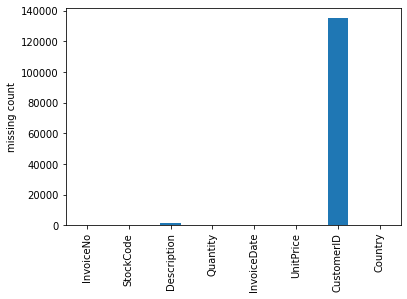

In [14]:
raw_data.isnull().sum().plot.bar()
plt.ylabel('missing count');

In [15]:
# looking at the missing values
raw_data[raw_data['CustomerID'].isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [16]:
# checking null values %
raw_data['CustomerID'].isnull().sum()*100/len(raw_data)

25.16337737891812

imputing missing CustomerID is not possible and our main task is of customer segmentation so we will drop missing CustomerID values which are around 25%.

In [17]:
# droping missing values
raw_data = raw_data.dropna(subset=['CustomerID'],axis=0)
raw_data.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [18]:
raw_data.shape

(401604, 8)

In [19]:
raw_data.describe()

,Quantity,UnitPrice,CustomerID
count,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818
std,250.283037,69.764035,1714.006089
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16784.000000
max,80995.000000,38970.000000,18287.000000


We can see minimum value for Quantity is negative so we will explore the quantity column

# **Exploratory Data Analysis**

**distribution and box plot for unitprice, Quantity**

bar plot for top maximum selling products (top description)

top stockcodes based on selling

### **Exploring Quantity column**

In [20]:
raw_data['Quantity'].describe()

count    401604.000000
mean         12.183273
std         250.283037
min      -80995.000000
25%           2.000000
50%           5.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64

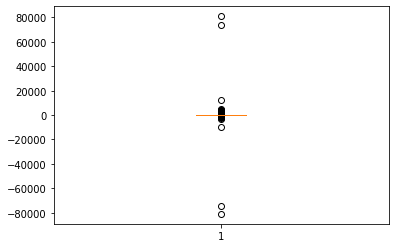

In [21]:
plt.boxplot(raw_data['Quantity']);

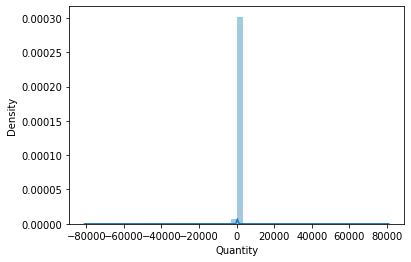

In [22]:
sns.distplot(raw_data['Quantity']);

In [23]:
raw_data[raw_data['Quantity'] == -80995]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom


This type of transactions are of cancelled orders and we saw in description this transactions have C at starting of InvoiceNo. We will see more out of it

In [24]:
raw_data[raw_data['InvoiceNo'].astype(str).str.contains('C')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [25]:
cancelled_df= raw_data[raw_data['InvoiceNo'].astype(str).str.contains('C')]

In [26]:
cancelled_df[cancelled_df['Quantity']>0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


We can see Quantity is less than 0 for all InvoiceNo starting with C as we expected this are the cancelled orders

In [27]:
cancelled_df.shape

(8872, 8)

**There are 8872 cancelled orders which are huge**

### **Exploring UnitPrice**

In [28]:
raw_data['UnitPrice'].describe()

count    401604.000000
mean          3.474064
std          69.764035
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max       38970.000000
Name: UnitPrice, dtype: float64

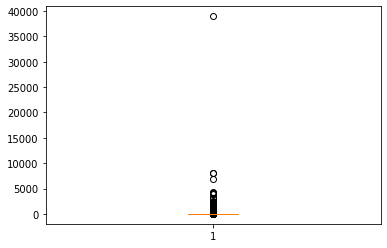

In [29]:
plt.boxplot(raw_data['UnitPrice']);

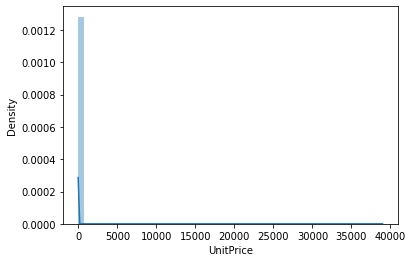

In [30]:
sns.distplot(raw_data['UnitPrice']);

In [31]:
raw_data[raw_data['UnitPrice']==raw_data['UnitPrice'].max()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
222681,C556445,M,Manual,-1,2011-06-10 15:31:00,38970.0,15098.0,United Kingdom


**The order with max unitprice is a cancelled order**

### **Exploring CustomerID and InvoiceNo**

In [32]:
# number of customers in total
len(raw_data['CustomerID'].value_counts())

4372

In [33]:
# number of transactions
len(raw_data['InvoiceNo'].value_counts())

22190

**4372 customer records are present in the dataset having 22190 transactions in total.**

In [34]:
cmr_df= raw_data['CustomerID'].value_counts()

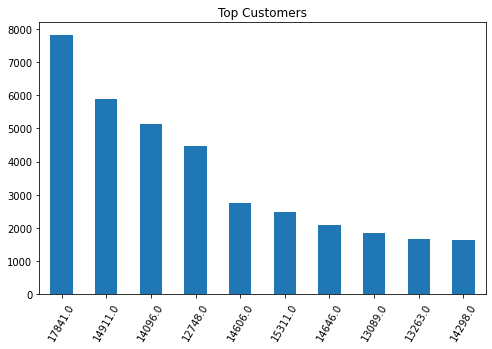

In [35]:
# top customers 
plt.figure(figsize=(8,5))
cmr_df.head(10).plot.bar()
plt.title('Top Customers')
plt.xticks(rotation=60);

**These are the top customers of the retail store and 17841 CustomerID has most number of transactions 7500+. This customer must be the wholesale customer of the store.**

In [36]:
# top customer
raw_data[raw_data['CustomerID']==17841.0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1441,C536543,22632,HAND WARMER RED RETROSPOT,-1,2010-12-01 14:30:00,2.10,17841.0,United Kingdom
1442,C536543,22355,CHARLOTTE BAG SUKI DESIGN,-2,2010-12-01 14:30:00,0.85,17841.0,United Kingdom
2037,536557,21495,SKULLS AND CROSSBONES WRAP,25,2010-12-01 14:41:00,0.42,17841.0,United Kingdom
2038,536557,46000R,POLYESTER FILLER PAD 45x30cm,2,2010-12-01 14:41:00,1.45,17841.0,United Kingdom
2039,536557,46000S,POLYESTER FILLER PAD 40x40cm,1,2010-12-01 14:41:00,1.45,17841.0,United Kingdom
...,...,...,...,...,...,...,...,...
537748,581334,22077,6 RIBBONS RUSTIC CHARM,1,2011-12-08 12:07:00,1.95,17841.0,United Kingdom
537749,581334,23399,HOME SWEET HOME HANGING HEART,3,2011-12-08 12:07:00,0.85,17841.0,United Kingdom
537750,581334,22893,MINI CAKE STAND T-LIGHT HOLDER,12,2011-12-08 12:07:00,0.42,17841.0,United Kingdom
537751,581334,22371,AIRLINE BAG VINTAGE TOKYO 78,1,2011-12-08 12:07:00,4.25,17841.0,United Kingdom


### **Examining StockCode and their Description**

In [37]:
# total number of products
raw_data['StockCode'].nunique()

3684

**There are 3684 products in the dataset.**

In [38]:
# number of unique item descriptions
raw_data['Description'].nunique()

3896

**The number of products and the number of descriptions do not match. We can say that some of the products might have more than one descriptions.**

In [39]:
# stockcodes having more than one descriptions
stock_df= raw_data.groupby(["StockCode","Description"]).count().reset_index()['StockCode'].value_counts()
stock_df.head()

23236    4
23196    4
23366    3
23203    3
22937    3
Name: StockCode, dtype: int64

**These are the top StockCodes with more than one description. Since our objective is Customer Segmentation this will not any impact on our analysis so we will neglect this.**

### **Exploring Country column**

In [40]:
country_cnt = raw_data['Country'].value_counts()
len(country_cnt)

37

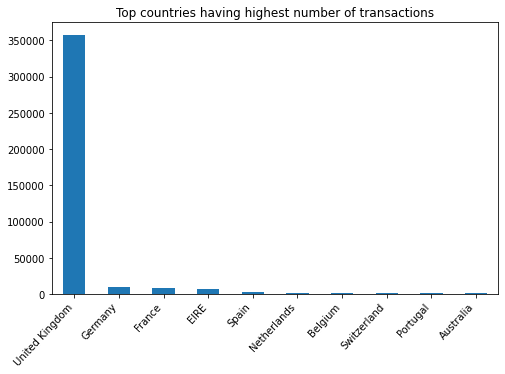

In [41]:
# top countries having highest number of transactions
plt.figure(figsize=(8,5))
country_cnt.head(10).plot.bar()
plt.title('Top countries having highest number of transactions');
plt.xticks(rotation=47, ha="right")
plt.show()

Top 5 countries having highest number of transactions are:


1.   United Kingdom
2.   Germany
3.   France
4.   EIRE
5.   Spain



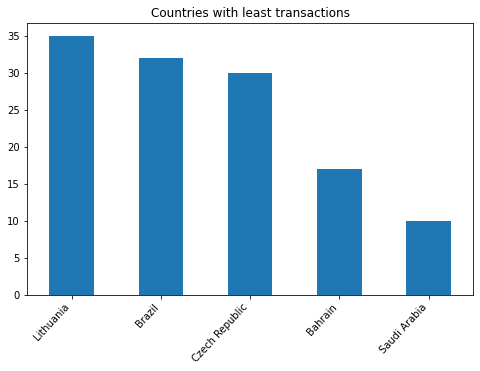

In [42]:
# countries with least transactions
plt.figure(figsize=(8,5))
country_cnt.tail().plot.bar()
plt.title('Countries with least transactions')
plt.xticks(rotation=47, ha="right")
plt.show()

Countries with least transactions:
1. Lithuania
2. Brazil
3. Czech Republic
4. Bahrain
5. Saudi Arabia

In [43]:
# checking transaction % in UK
tr_uk = round(len(raw_data[raw_data['Country']=='United Kingdom']) / len(raw_data) * 100,2)
print(f"{tr_uk}% transactions are from United Kingdom.")

88.83% transactions are from United Kingdom.


# **Data Preprocessing**

**We will consider only United Kingdom retail data for maximum impact and not to form clustering on geographical conditions.**

In [44]:
# filtering only United Kingdom customers data
ukretail_df= raw_data[raw_data['Country'] == 'United Kingdom']

**We saw before there were cancelled orders present in the dataset.So, filtering cancelled orders also.**

In [45]:
# filtering cancelled orders
ukretail_df= ukretail_df[ukretail_df['Quantity']>0]

**Creating total cost column**

In [46]:
# total cost
ukretail_df['total_cost'] = ukretail_df["Quantity"] * ukretail_df["UnitPrice"]

In [47]:
import datetime as dt
# extract the date from datetime
def extract_date(datetime_obj):
  return datetime_obj.date()

In [48]:
# assigning date column
ukretail_df['date'] = ukretail_df['InvoiceDate'].apply(extract_date)

In [49]:
# checking dates
print(f"first date: {ukretail_df['date'].min()}")
print(f"latest date: {ukretail_df['date'].max()}")

first date: 2010-12-01
latest date: 2011-12-09


In [50]:
ukretail_df.shape

(349227, 10)

In [51]:
ukretail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_cost,date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01


# **RFM Analysis**

## **Recency**
To calculate recency, We will fix a reference date for finding the recent transactions. The reference date would be a day after the most recent transaction date in the dataset. Then we will calculate the days difference between the most recent transaction carried out by the customer and this reference date.

Setting reference date as 2011-12-10 as last date of transaction in our dataset is 2011-12-09

In [52]:
# setting reference date as 2011-12-10
ref_date= dt.date(2011,12,10)

In [53]:
# checking recent purchase date
recency_df = ukretail_df.groupby("CustomerID")['date'].max().reset_index()
recency_df = recency_df.rename(columns={'date':'recent_purchase'})
recency_df.head()

,CustomerID,recent_purchase
0,12346.0,2011-01-18
1,12747.0,2011-12-07
2,12748.0,2011-12-09
3,12749.0,2011-12-06
4,12820.0,2011-12-06


we can see this are the last date of purchase of the customers

In [54]:
# calculate recency
recency_df['Recency'] = recency_df['recent_purchase'].apply(lambda x: (ref_date - x).days)

In [55]:
recency_df.head()

,CustomerID,recent_purchase,Recency
0,12346.0,2011-01-18,326
1,12747.0,2011-12-07,3
2,12748.0,2011-12-09,1
3,12749.0,2011-12-06,4
4,12820.0,2011-12-06,4


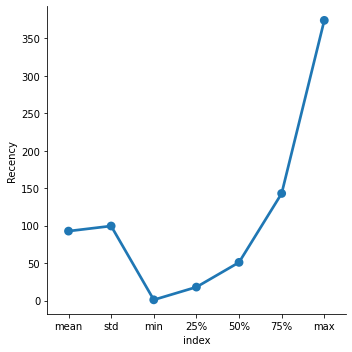

In [56]:
# Descriptive Statistics of Recency
describe_recency = recency_df.describe()
describe_recency.reset_index(inplace=True)
describe_recency = describe_recency[describe_recency['index'] != 'count']
sns.factorplot(x='index', y='Recency', data=describe_recency)
plt.show()

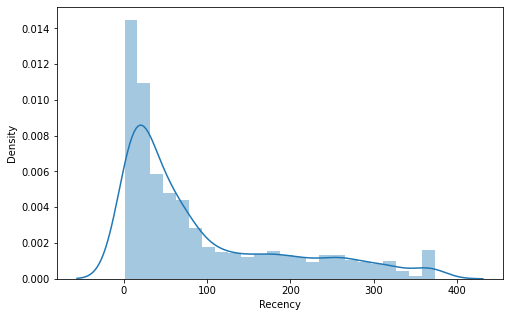

In [57]:
plt.figure(figsize=(8,5))
sns.distplot(recency_df['Recency']);

We can see that there are more customers who have purchased recently and the graph decrease furthur.

## **Frequency**

Frequency will helps us to know how many times a customer has purchased.

In [58]:
frequency_df = ukretail_df.groupby('CustomerID').agg({'InvoiceNo': 'count'}).reset_index()
frequency_df.rename(columns={'InvoiceNo': 'Frequency'}, inplace= True)
frequency_df.head()

,CustomerID,Frequency
0,12346.0,1
1,12747.0,103
2,12748.0,4413
3,12749.0,199
4,12820.0,59


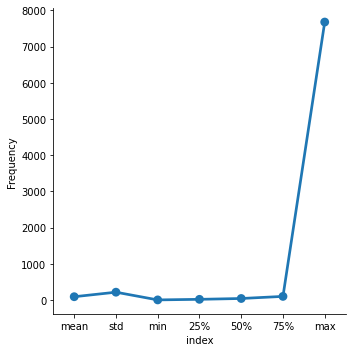

In [59]:
# Descriptive Statistics of frequency
describe_frequency = frequency_df.describe()
describe_frequency.reset_index(inplace=True)
describe_frequency = describe_frequency[describe_frequency['index'] != 'count']
sns.factorplot(x='index', y='Frequency', data=describe_frequency)
plt.show()

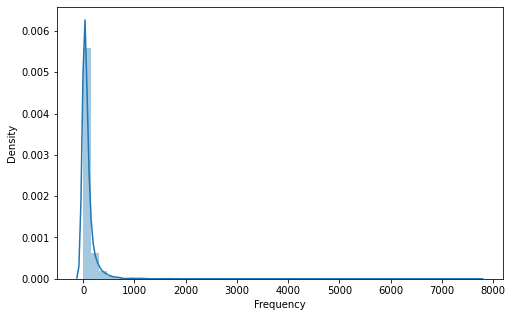

In [60]:
plt.figure(figsize=(8,5))
sns.distplot(frequency_df['Frequency']);

## **Monetary**

In [61]:
monetary_df = ukretail_df.groupby('CustomerID').agg({'total_cost': 'sum'}).reset_index()
monetary_df.rename(columns={'total_cost': 'Monetary'}, inplace= True)
monetary_df.head()

,CustomerID,Monetary
0,12346.0,77183.60
1,12747.0,4196.01
2,12748.0,33053.19
3,12749.0,4090.88
4,12820.0,942.34


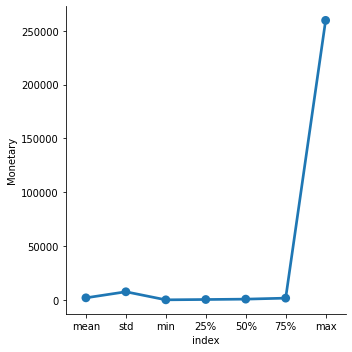

In [62]:
# Descriptive Statistics of monetary
describe_monetary = monetary_df.describe()
describe_monetary.reset_index(inplace=True)
describe_monetary = describe_monetary[describe_monetary['index'] != 'count']
sns.factorplot(x='index', y='Monetary', data=describe_monetary)
plt.show()

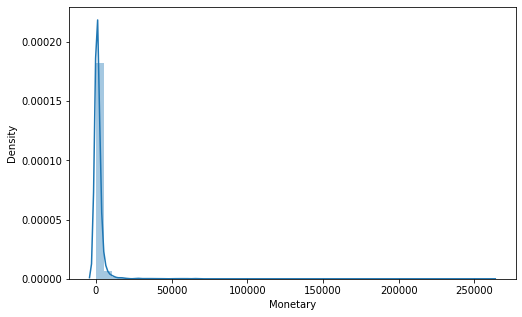

In [63]:
plt.figure(figsize=(8,5))
sns.distplot(monetary_df['Monetary']);

### **Combining Recency, Frequency and Monetary**

In [64]:
# combining Recency, Frequency and Monetary
rfm_df= recency_df.merge(frequency_df, how="outer")
rfm_df= rfm_df.merge(monetary_df, how="outer")
rfm_df.drop("recent_purchase", axis=1, inplace=True)
rfm_df.set_index("CustomerID", inplace=True)

In [65]:
rfm_df.head(10)

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,1,77183.60
12747.0,3,103,4196.01
12748.0,1,4413,33053.19
12749.0,4,199,4090.88
12820.0,4,59,942.34
12821.0,215,6,92.72
12822.0,71,46,948.88
12823.0,75,5,1759.50
12824.0,60,25,397.12


In [66]:
rfm_df.describe()

,Recency,Frequency,Monetary
count,3921.000000,3921.000000,3921.000000
mean,92.722265,89.065800,1857.950687
std,99.528532,214.022733,7477.736186
min,1.000000,1.000000,0.000000
25%,18.000000,17.000000,298.110000
50%,51.000000,40.000000,644.300000
75%,143.000000,98.000000,1570.810000
max,374.000000,7676.000000,259657.300000


We can see the minimum monetary value is 0 and it do not make sense to us so will remove the rows with 0 monetary value

In [67]:
rfm_df= rfm_df[rfm_df['Monetary'] > 0]

We will assign the score from 1 to 4 on the basis of recency, frequency and monetary based on there quartiles. 4 being the best score and 1 being the worst score. A final score will be calculated simply by combining individual RFM scores.

In [68]:
quartiles= rfm_df.quantile(q=[0.25,0.5,0.75])
quartiles

,Recency,Frequency,Monetary
0.25,18.0,17.0,298.185
0.50,51.0,40.0,644.975
0.75,143.0,98.0,1571.285


Higher recency is bad so it will get the lesser score but in case of frequency and monetary higher values are good so they will get higher scores.

**Creating functions to rate the Recency, Frequency and Monetary based on 1 to 4.**

In [69]:
#Functions to create R, F and M segments
def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
    
def FnMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [70]:
#Calculating R, F and M segment value and adding into existing dataset
rfm_df['R'] = rfm_df['Recency'].apply(RScoring, args=('Recency',quartiles,))
rfm_df['F'] = rfm_df['Frequency'].apply(FnMScoring, args=('Frequency',quartiles,))
rfm_df['M'] = rfm_df['Monetary'].apply(FnMScoring, args=('Monetary',quartiles,))

In [71]:
rfm_df.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12346.0,326,1,77183.60,1,1,4
12747.0,3,103,4196.01,4,4,4
12748.0,1,4413,33053.19,4,4,4
12749.0,4,199,4090.88,4,4,4
12820.0,4,59,942.34,4,3,3


We can see best recency i.e customer with most recently purchase has R=4 score and same is with Frequency and Monetary

We will combine the scores to create a single rfm score

In [72]:
# Concatenating RFM
rfm_df['RFM_Segment'] = rfm_df['R'].map(str) + rfm_df['F'].map(str) + rfm_df['M'].map(str)

#Calculating RFMScore 
rfm_df['RFM_score'] = rfm_df[['R', 'F', 'M']].sum(axis = 1)
rfm_df.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_score
CustomerID,,,,,,,,
12346.0,326,1,77183.60,1,1,4,114,6
12747.0,3,103,4196.01,4,4,4,444,12
12748.0,1,4413,33053.19,4,4,4,444,12
12749.0,4,199,4090.88,4,4,4,444,12
12820.0,4,59,942.34,4,3,3,433,10


The RFMScore of 12 will show us the best customers of the retail store.

In [73]:
rfm_df[rfm_df['RFM_score']==12]

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_score
CustomerID,,,,,,,,
12747.0,3,103,4196.01,4,4,4,444,12
12748.0,1,4413,33053.19,4,4,4,444,12
12749.0,4,199,4090.88,4,4,4,444,12
12839.0,3,314,5591.42,4,4,4,444,12
12841.0,5,414,3991.58,4,4,4,444,12
...,...,...,...,...,...,...,...,...
18229.0,12,164,7276.90,4,4,4,444,12
18241.0,10,104,2073.09,4,4,4,444,12
18245.0,8,175,2567.06,4,4,4,444,12


There are 407 customers who had purchased recently, most frequently and also spend most.

**Analyzing RFM score distribution and segmenting them manually as Good, average and Bad customers**

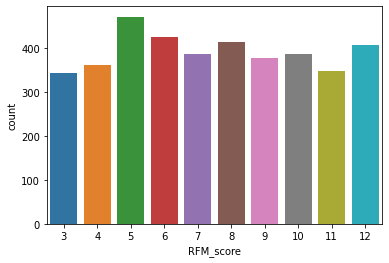

In [74]:
sns.countplot(rfm_df["RFM_score"]);

In [75]:
def create_segments(df):
    if df['RFM_score'] >= 9:
        return 'Good'
    elif (df['RFM_score'] >= 5) and (df['RFM_score'] < 9):
        return 'Average'
    else:
        return 'Bad'

In [76]:
rfm_df['Segment'] = rfm_df.apply(create_segments, axis=1)
rfm_df.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_score,Segment
CustomerID,,,,,,,,,
12346.0,326,1,77183.60,1,1,4,114,6,Average
12747.0,3,103,4196.01,4,4,4,444,12,Good
12748.0,1,4413,33053.19,4,4,4,444,12,Good
12749.0,4,199,4090.88,4,4,4,444,12,Good
12820.0,4,59,942.34,4,3,3,433,10,Good


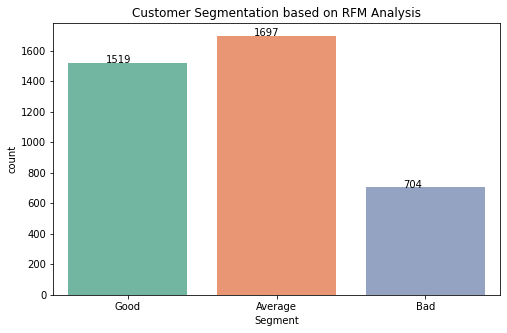

In [77]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x=rfm_df["Segment"], palette = "Set2",
                   order=['Good','Average','Bad'])

for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.title("Customer Segmentation based on RFM Analysis")
plt.show()

**From this RFM analysis we segmented the customers into three clusters as Good, Average and Bad customers based on the RFM score.**

**Next, we will use K-means clustering to practically find out the optimal number of clusters.**

## **Data Preprocessing**

In [78]:
rfm_data = rfm_df[["Recency", "Frequency", "Monetary"]]
rfm_data.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,1,77183.60
12747.0,3,103,4196.01
12748.0,1,4413,33053.19
12749.0,4,199,4090.88
12820.0,4,59,942.34


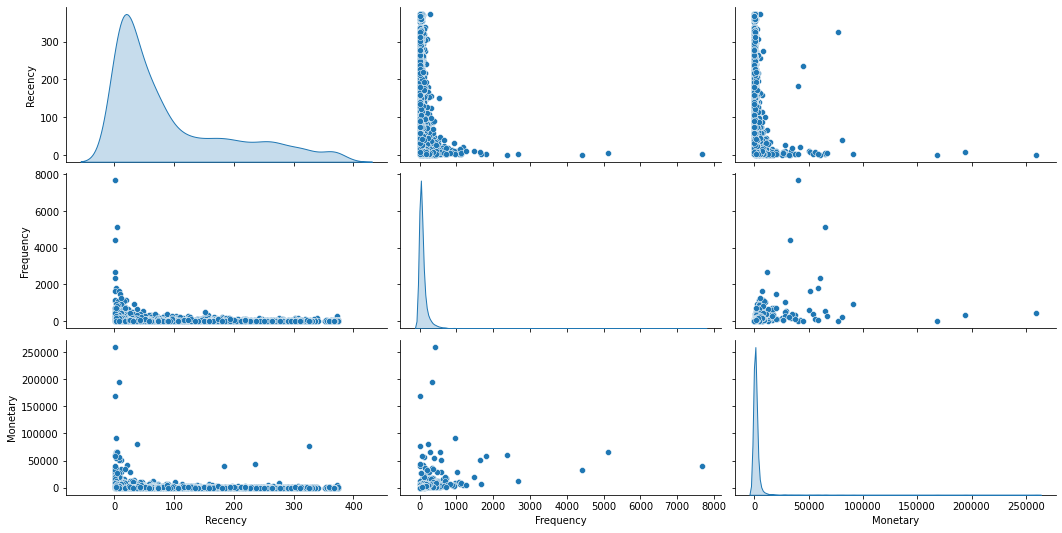

In [79]:
sns.pairplot(rfm_data, diag_kind="kde", aspect=2);

**We can see above the distributions are skewed.** As we require normally distributed data to perform K-means clustering we will apply log transformation to reduce skewness.

In [80]:
#log transformation
new_df = np.log(rfm_data)
new_df.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,5.786897,0.000000,11.253942
12747.0,1.098612,4.634729,8.341889
12748.0,0.000000,8.392310,10.405873
12749.0,1.386294,5.293305,8.316515
12820.0,1.386294,4.077537,6.848366


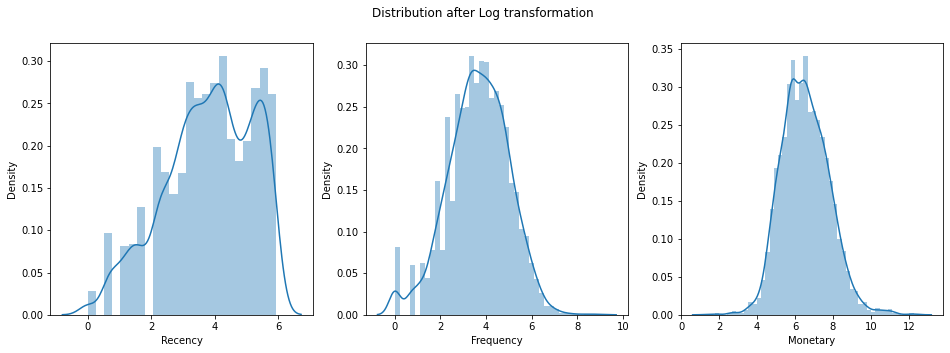

In [81]:
# checking distrubutions after log transformation
plt.figure(figsize=(16,5))

plt.subplot(1, 3, 1)
sns.distplot(new_df['Recency'])

plt.subplot(1, 3, 2)
sns.distplot(new_df['Frequency'])

plt.subplot(1, 3, 3)
sns.distplot(new_df['Monetary'])

plt.suptitle("Distribution after Log transformation")
plt.show()

**Scaling the data using StandardScaler**

In [82]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# normalizing data
norm_data = scaler.fit_transform(new_df)

## **Evaluation using Silhoutte method**

we will try clusters k= 3, 4 and 5 and check their silhouette coefficient.

In [83]:
from sklearn.metrics import silhouette_score

for n_clusters in range(3,10):
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=100)
    kmeans.fit(norm_data)
    clusters = kmeans.predict(norm_data)
    silhouette_avg = silhouette_score(norm_data, clusters)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 3 The average silhouette_score is : 0.30389701054555585
For n_clusters = 4 The average silhouette_score is : 0.3017220994204454
For n_clusters = 5 The average silhouette_score is : 0.2808129877691795
For n_clusters = 6 The average silhouette_score is : 0.27500832650166634
For n_clusters = 7 The average silhouette_score is : 0.2638920062520923
For n_clusters = 8 The average silhouette_score is : 0.2603145576966808
For n_clusters = 9 The average silhouette_score is : 0.2655530098422956


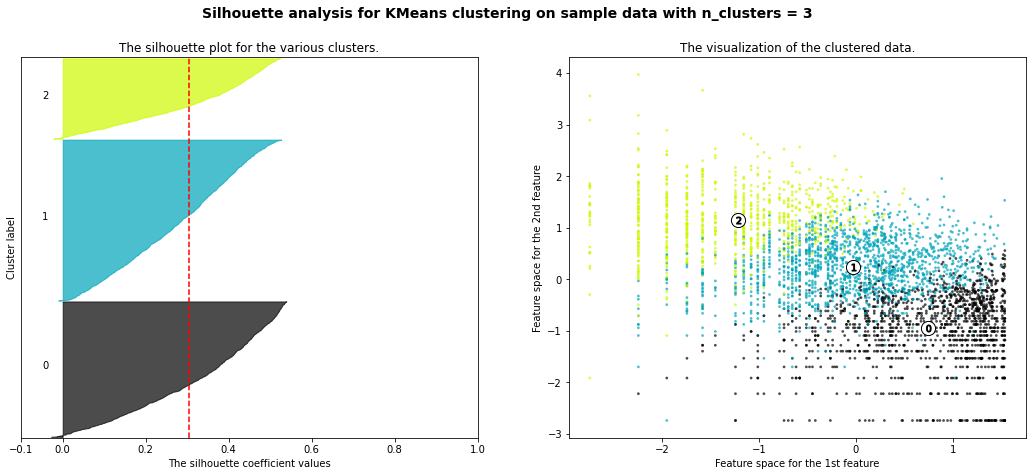

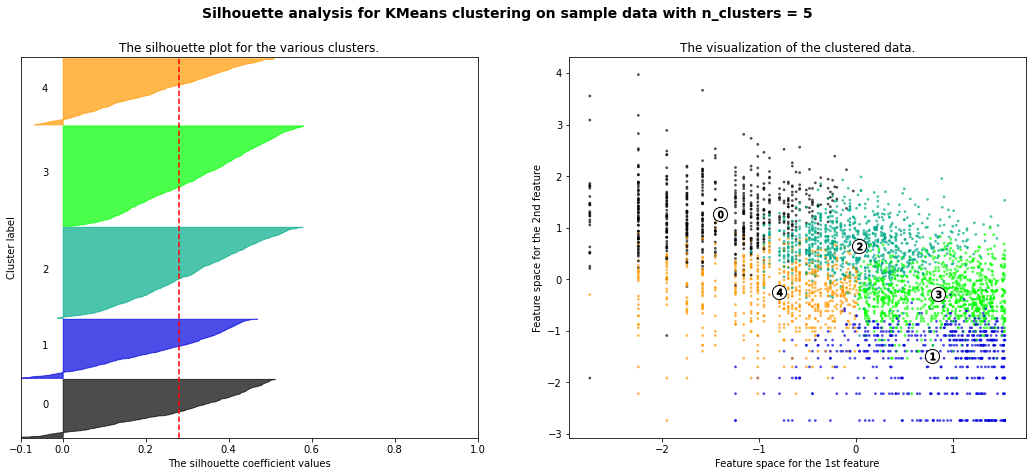

In [84]:
# plot silhoutte score
X = norm_data
range_n_clusters = [3,5]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

The best silhouette score obtained is when the number of clusters is 3.




## **Implementing Hierarchical Clustering**

In [85]:
# Fitting hierarchical clustering
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean')
model.fit(norm_data)

AgglomerativeClustering(n_clusters=3)

In [86]:
# assigning hierarchical clusters
rfm_df['HR_labels']=model.labels_

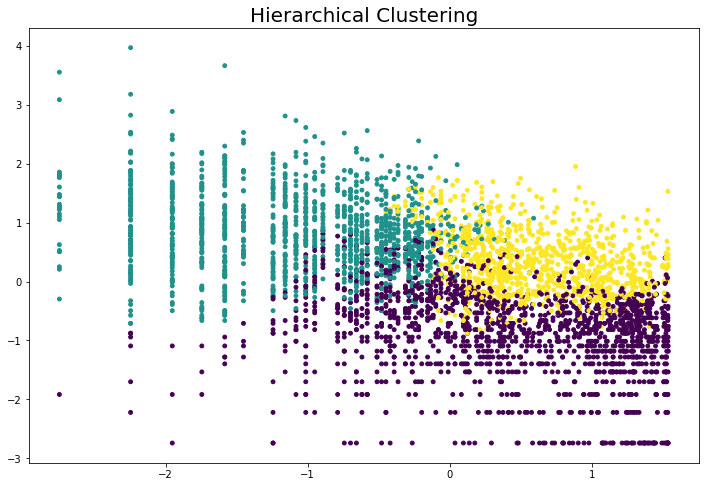

In [87]:
# Plotting resulting clusters
plt.figure(figsize=(12,8))
plt.scatter(X[:, 0], X[:, 1],c=rfm_df['HR_labels'],s=15)

plt.title('Hierarchical Clustering',fontsize=20)
plt.show()

We can see that ,Customers are well separate when we use Hierarchical clustering and optimal number of cluster is equal to 3

